In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [2]:
with open('Machine Learning (2).txt','r',encoding='utf-8') as myfile:
    my_text=myfile.read()

In [3]:
my_text[:500]

'Machine learning (ML) is a branch of artificial intelligence (AI) and computer science that focuses on the using data and algorithms to enable AI to imitate the way that humans learn, gradually improving its accuracy.\nUC Berkeley (link resides outside ibm.com) breaks out the learning system of a machine learning algorithm into three main parts.\nA Decision Process: In general, machine learning algorithms are used to make a prediction or classification. Based on some input data, which can be label'

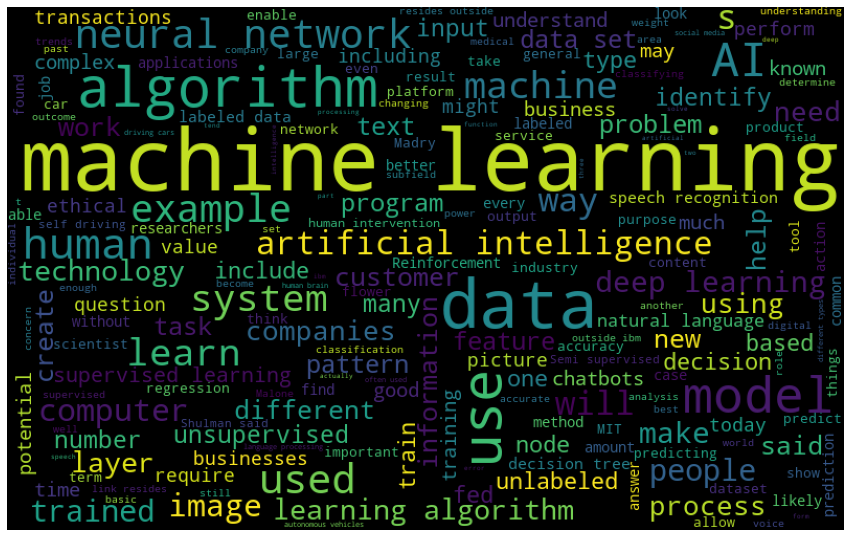

In [4]:
plt.figure(figsize=(15,19))
wordcloud_n=WordCloud(width=800,height=500,random_state=101,max_font_size=100).generate(my_text)
plt.imshow(wordcloud_n)
plt.axis('off')
plt.show()

In [5]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([my_text])
vocab_length=len(tokenizer.word_index)+1

In [6]:
vocab_length

1720

In [7]:
sequences=[]
for line in my_text.split('\n'):
    seq=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(seq)):
        seq_n=seq[:i+1]
        sequences.append(seq_n)

In [8]:
sequences[:20]

[[7, 5],
 [7, 5, 738],
 [7, 5, 738, 11],
 [7, 5, 738, 11, 6],
 [7, 5, 738, 11, 6, 739],
 [7, 5, 738, 11, 6, 739, 4],
 [7, 5, 738, 11, 6, 739, 4, 39],
 [7, 5, 738, 11, 6, 739, 4, 39, 40],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740, 17],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740, 17, 1],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740, 17, 1, 76],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740, 17, 1, 76, 10],
 [7, 5, 738, 11, 6, 739, 4, 39, 40, 23, 3, 97, 326, 9, 740, 17, 1, 76, 10, 3],
 [7,
  5,
  738,
  11,
  6,
  739,
  4,
  39,
  40,
  23,
  3,
  97,
  326,
  9,
  740,
  17,
  1,
  76,
  10,
  3,
  22]]

In [9]:
maxlen=max([len(i) for i in sequences])

In [10]:
maxlen

162

In [11]:
pad_seq=pad_sequences(sequences,maxlen=maxlen,padding='pre')

In [12]:
pad_seq

array([[  0,   0,   0, ...,   0,   7,   5],
       [  0,   0,   0, ...,   7,   5, 738],
       [  0,   0,   0, ...,   5, 738,  11],
       ...,
       [  0,   0,   0, ..., 437,   2,   6],
       [  0,   0,   0, ...,   2,   6, 405],
       [  0,   0,   0, ...,   6, 405, 674]])

In [13]:
X=pad_seq[:,:-1]
y=pad_seq[:,-1]

In [14]:
X

array([[  0,   0,   0, ...,   0,   0,   7],
       [  0,   0,   0, ...,   0,   7,   5],
       [  0,   0,   0, ...,   7,   5, 738],
       ...,
       [  0,   0,   0, ...,   5, 437,   2],
       [  0,   0,   0, ..., 437,   2,   6],
       [  0,   0,   0, ...,   2,   6, 405]])

In [15]:
y

array([  5, 738,  11, ...,   6, 405, 674])

In [16]:
len(X)

7045

In [17]:
len(y)

7045

In [18]:
embedding_dictionary=dict()
glove_file=open('glove.6B.100d.txt',encoding='utf8')
for line in glove_file:
    record=line.split()
    word=record[0]
    vec=np.asarray(record[1:],dtype='float32')
    embedding_dictionary[word]=vec
glove_file.close()

In [19]:
embedding_matrix=np.zeros((vocab_length,100))
for word,index in tokenizer.word_index.items():
    embedding_vector=embedding_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [20]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [31]:
model=Sequential()

In [32]:
model.add(Embedding(vocab_length,100,embeddings_initializer=Constant(embedding_matrix),input_shape=(maxlen,)))
model.add(LSTM(150))
model.add(Dense(vocab_length,activation='softmax'))

In [33]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 162, 100)            │         172,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 150)                 │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1720)                │         259,720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,320 (2.22 MB)

 Trainable params: 582,320 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history=model.fit(X,y,epochs=50,verbose=1)

Epoch 1/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.0400 - loss: 6.7303
Epoch 2/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 140ms/step - accuracy: 0.0694 - loss: 6.0354
Epoch 3/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 140ms/step - accuracy: 0.1052 - loss: 5.6922
Epoch 4/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.1227 - loss: 5.3456
Epoch 5/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 141ms/step - accuracy: 0.1532 - loss: 4.9564
Epoch 6/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 33s 149ms/step - accuracy: 0.1869 - loss: 4.5625
Epoch 7/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.2054 - loss: 4.2562
Epoch 8/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 34s 154ms/step - accuracy: 0.2434 - loss: 3.8955
Epoch 9/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 33s 151ms/step - accuracy: 0.2739 - loss: 3.6036
Epoch 10/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 32s 146ms/step - accuracy: 0.3134 - loss: 3.2930
Epoch 11/50
221/221 ━━━━━━━━━━━━━━━━━━━━ 31s 142ms/step - accuracy: 0.3649 - loss: 3.0308
Epoch 12/50
221/221

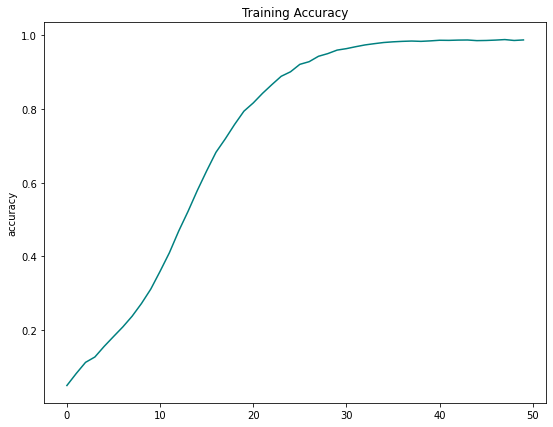

In [36]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal')
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.show()

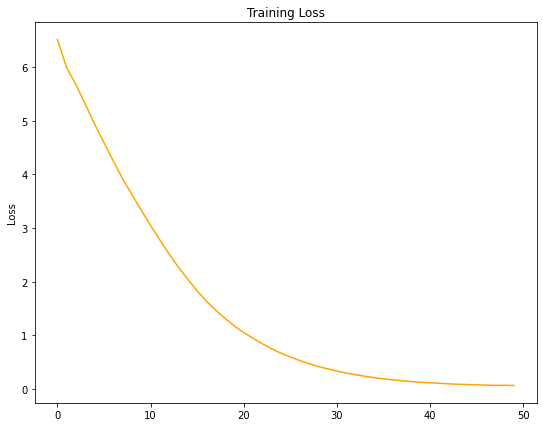

In [37]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='orange')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.show()

In [47]:
def next_word_prediction(input_text,number):
    predict_next_words=number
    for _ in range(predict_next_words):
        token_list=tokenizer.texts_to_sequences([input_text])[0]
        pad=np.array(pad_sequences([token_list],maxlen=maxlen-1,padding='pre'))
        predicted=np.argmax(model.predict(pad),axis=-1)
        output_word=''
        for word,index in tokenizer.word_index.items():
            if predicted==index:
                output_word=word
                break
        input_text+=' '+output_word
    return(input_text)

In [48]:
next_word_prediction('machine learning',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'machine learning is a subfield of artificial intelligence ai that uses algorithms'

In [51]:
next_word_prediction('deep learning is a',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


'deep learning is a sub field of neural networks are neural networks with many'

In [52]:
next_word_prediction('artificial intelligence is',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'artificial intelligence is changing every industry here’s what you need to know about'

In [53]:
next_word_prediction('Decision Tree',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'Decision Tree algorithms are used for both predicting numerical values regression problems'

In [55]:
next_word_prediction('linear regression',20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'linear regression this algorithm is used to predict numerical values based on a linear relationship between different values for example the technique'

In [56]:
next_word_prediction('supervised learning',10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


'supervised learning also known as supervised machine learning is defined by its'